In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

from sklearn.linear_model import LinearRegression, Ridge

### 岭回归

In [32]:
x = 
f = w * x + k


In [25]:
n = np.array([[1,2, 2],[1,4, 3]])
# 求矩阵的秩
np.linalg.matrix_rank(n)
# 求矩阵的秩

2

In [26]:
# 转秩
n.T

array([[1, 1],
       [2, 4],
       [2, 3]])

In [29]:
# 逆矩阵, 不满秩的矩阵无法求逆
np.linalg.inv(n)

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
linear = LinearRegression()

ridge = Ridge(alpha)

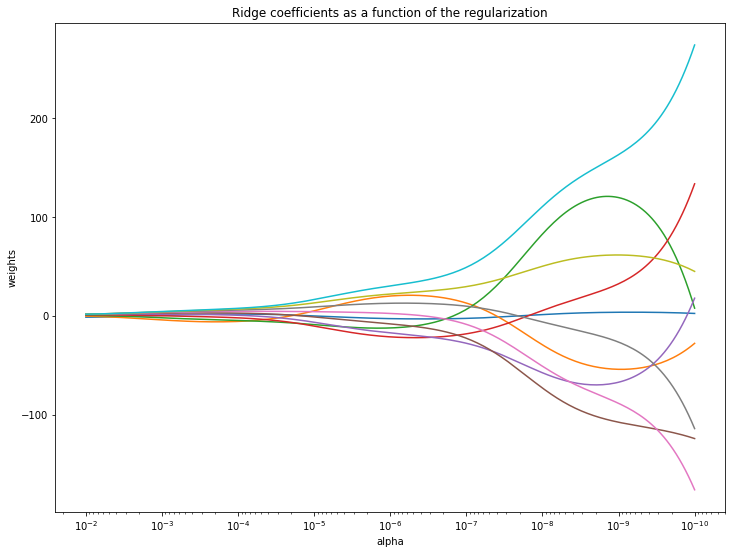

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
###############################################################################
# Compute paths
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)
coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
###############################################################################
# Display results
plt.figure(figsize=(12,9))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

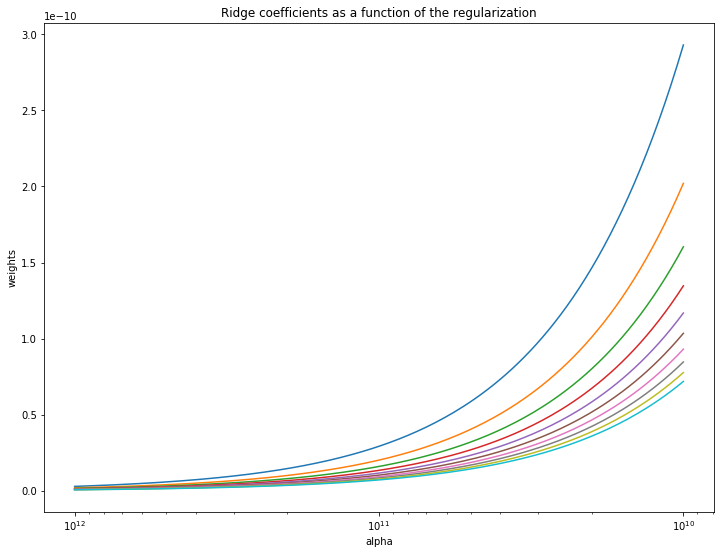

In [46]:
X = 1. / (np.arange(1, 11) + np.arange(0,10)[:, np.newaxis])
y = np.ones(10)
n_alpha = 200
alphas = np.logspace(10, 12, n_alphas)
clf = Ridge(fit_intercept=False)
coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X,y)
    coefs.append(clf.coef_)

plt.figure(figsize=(12,9))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

(1258925411794.1611,
 7943282347.242822,
 -1.3890131291507857e-11,
 3.075057279914852e-10)

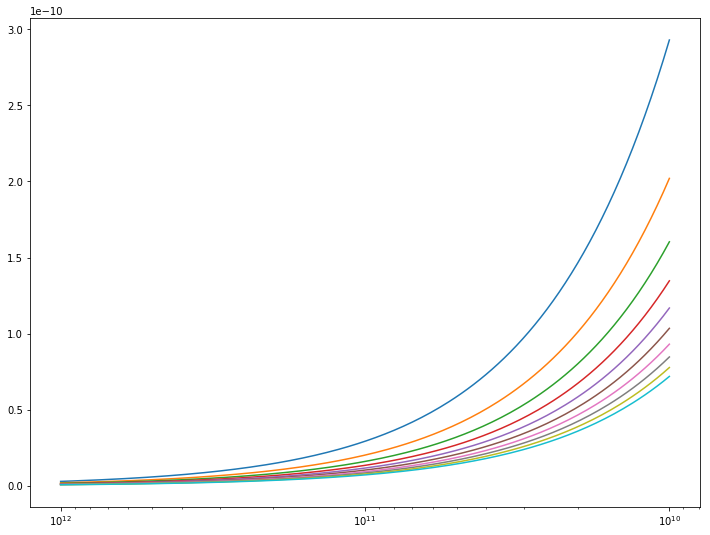

In [45]:
plt.figure(figsize=(12, 9))
ax = plt.gca()
s = ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')

### Lasso回归

In [48]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston

In [49]:
boston = load_boston()

In [52]:

train = DataFrame(boston.data, columns = boston.feature_names, index=boston.target) 


In [56]:
# 样本数量和样本特征之间的关系， 
# 是否是多重共线
# 是否是过拟合严重
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [59]:
# 采用比值的方式将数据的量级进行统一
train_ = train/train.sum()

In [60]:
train_.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
24.0,0.000003,0.00313,0.000410,0.0,0.001917,0.002068,0.001879,0.002130,0.000207,0.001433,0.001638,0.002199,0.000778
21.6,0.000015,0.00000,0.001255,0.0,0.001671,0.002019,0.002274,0.002587,0.000414,0.001172,0.001906,0.002199,0.001428
34.7,0.000015,0.00000,0.001255,0.0,0.001671,0.002259,0.001761,0.002587,0.000414,0.001172,0.001906,0.002177,0.000629
33.4,0.000018,0.00000,0.000387,0.0,0.001632,0.002201,0.001320,0.003157,0.000621,0.001075,0.002002,0.002187,0.000459
36.2,0.000038,0.00000,0.000387,0.0,0.001632,0.002247,0.001562,0.003157,0.000621,0.001075,0.002002,0.002199,0.000832


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(train_, train_.index)

In [72]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)


lasso.coef_

array([-283.22716267,  219.5227629 ,   -0.        ,    9.59220913,
         -0.        ,    0.        ,   -0.        ,    0.        ,
         -0.        ,   -0.        ,   -0.        ,    0.        ,
         -0.        ])

In [73]:
lasso.score(X_test, y_test)

0.11967289779908807

In [80]:
lasso_y_ = lasso.predict(X_test)

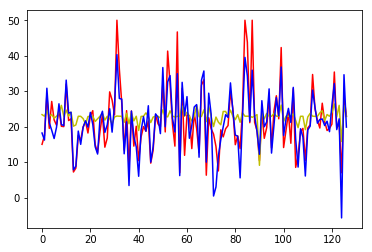

In [85]:
plt.plot(y_test, c='r')
plt.plot(lasso_y_, c='y')
plt.plot(linear_y_, c='b')

In [81]:
linear = LinearRegression()

linear.fit(X_train, y_train)

linear_y_ = linear.predict(X_test)

#### 把波士顿房价信息转化为分类模型

In [86]:
data = boston.data
feature = boston.feature_names
target = boston.target

In [92]:
# 对target 进行拆分
def transform_price(item):
    if item > 25:
        return 1
    else:
        return 0

In [93]:
target1 = Series(target).map(transform_price)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_, target1)

In [106]:
knn = KNeighborsClassifier(13)
knn.fit(X_train1, y_train1)
y1_ = knn.predict(X_test1)
knn.score(X_test1, y_test1)

0.8661417322834646

## 三种回归模型的比较

In [138]:
n_samples, features = 50, 200

X = np.random.random(size=(n_samples, features))

# 特征值
coefs = np.random.random(size=200)
# 假设 200 个特征 只有 10 个是有效的，对结果有影响
index = np.arange(0, 200, 1)
np.random.shuffle(index)

coefs[index[10:]] = 0

# 用系数乘以样本的系数，得到样本的真实标签
y = np.dot(X, coefs)

# 添加噪声
noise = np.random.random(size=50)*2 - 1
y_ = y + noise

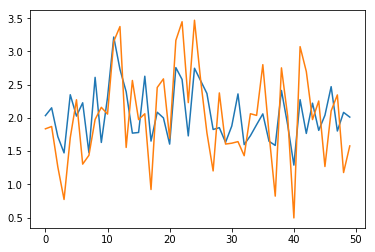

In [139]:
s = plt.plot(y)
s = plt.plot(y_)

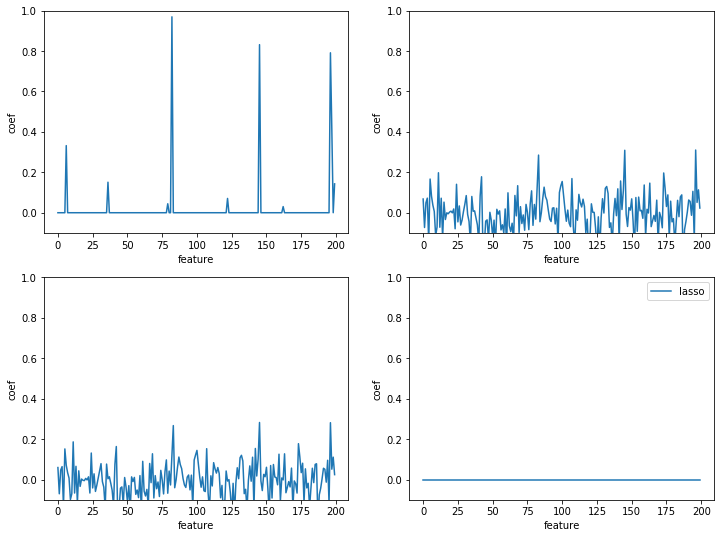

In [151]:
plt.figure(figsize=(12,9))

plt.subplot(221)
plt.plot(coefs,label = "True")
plt.xlabel("feature")
plt.ylabel("coef")
plt.ylim(-0.1,1)

plt.subplot(222)
plt.plot(coefs1,label = "linear")
plt.xlabel("feature")
plt.ylabel("coef")
plt.ylim(-0.1,1)


plt.subplot(223)
plt.plot(coefs2,label = "ridge")
plt.xlabel("feature")
plt.ylabel("coef")
plt.ylim(-0.1,1)

plt.subplot(224)
plt.plot(coefs3,label = "lasso")
plt.xlabel("feature")
plt.ylabel("coef")
plt.ylim(-0.1,1)
plt.legend()

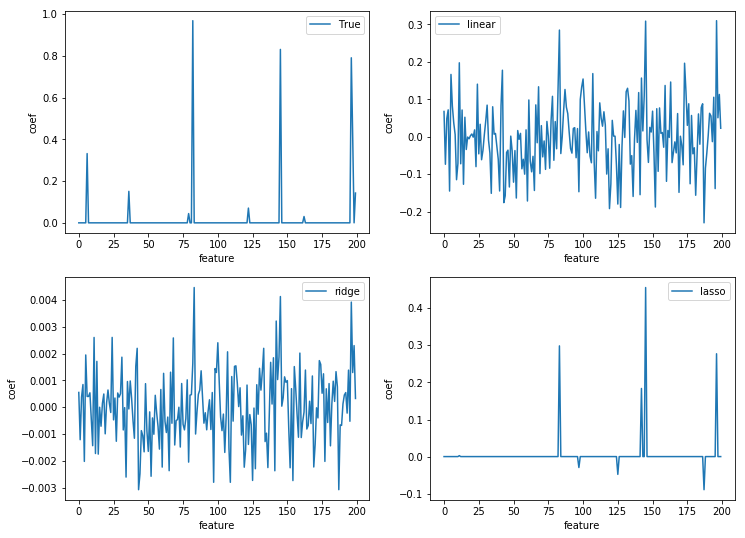

In [161]:
linear = LinearRegression()
ridge = Ridge(1000)
lasso = Lasso(0.05)


linear.fit(X, y_)
ridge.fit(X, y_)
lasso.fit(X, y_)

# 保留系数
coefs1 = linear.coef_
coefs2 = ridge.coef_
coefs3 = lasso.coef_

plt.figure(figsize=(12,9))

plt.subplot(221)
plt.plot(coefs,label = "True")
plt.xlabel("feature")
plt.ylabel("coef")
# plt.ylim(-0.1,1)
plt.legend()

plt.subplot(222)
plt.plot(coefs1,label = "linear")
plt.xlabel("feature")
plt.ylabel("coef")
# plt.ylim(-0.1,1)
plt.legend()


plt.subplot(223)
plt.plot(coefs2,label = "ridge")
plt.xlabel("feature")
plt.ylabel("coef")
# plt.ylim(-0.1,1)
plt.legend()

plt.subplot(224)
plt.plot(coefs3,label = "lasso")
plt.xlabel("feature")
plt.ylabel("coef")
# plt.ylim(-0.1,1)
plt.legend()

## 逻辑斯蒂回归

- make_blobs 产生假想数据集

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

from sklearn.linear_model import LinearRegression, Ridge


from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [9]:
# 生成分类样本, 两个特征，三个分类
train, target = make_blobs(n_samples=150, 
                           n_features=2,
                           centers=[[1,3],[5,1],[5,5]])

In [13]:
train.shape, target.shape
target

array([1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 2, 1,
       1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0,
       1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0])

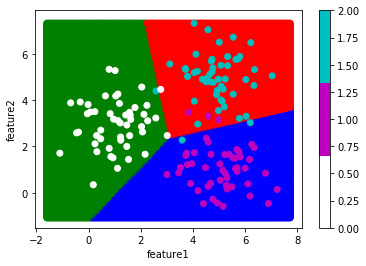

In [50]:
from matplotlib import colors

cmap1 = colors.ListedColormap(['w', 'm', 'c'])
cmap2 = colors.ListedColormap(['g', 'b', 'r'])

plt.plot()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cmap2)
plt.scatter(train[:,0], train[:,1],c=target, cmap=cmap1)
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.colorbar()

In [19]:
logistic = LogisticRegression()

logistic.fit(train, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
x = np.linspace(train[:,0].min()-0.5,train[:,0].max()+0.5, 200)
y = np.linspace(train[:,1].min()-0.5, train[:,1].max(), 200)

xx, yy = np.meshgrid(x, y)
X_test = np.c_[xx.ravel(), yy.ravel()]
y_test = logistic.predict(X_test)